# ATHELETES

In [ ]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
from scipy.stats import sem, t
athletes = pd.read_csv('athletes.csv')

# A. Visualisasi Data Histogram dan Boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47a0c3bc18>]],
      dtype=object)

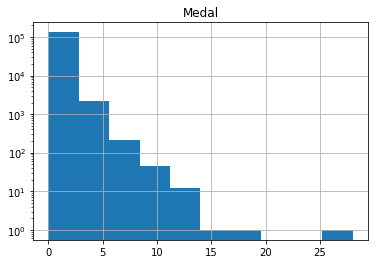

In [22]:
athletes.hist(log = True)

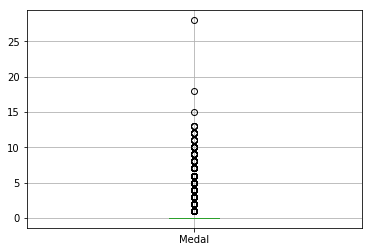

In [6]:
athletes.boxplot()

# B. Atribut Dasar

In [7]:
#Menghitung mean, standard deviation, minimum value, and maximal value
desc = athletes.describe().drop(['count', '25%', '50%', '75%'])

#Menghitung median
desc.loc['median'] = athletes.median().at['Medal']

#Menghitung variance
desc.loc['variance']= athletes.var().at['Medal']

#Menghitung kurtosis
desc.loc['kurtosis'] = athletes.kurtosis().at['Medal']

#Menghitung skewness
desc.loc['skewness'] = athletes.skew().at['Medal']

#Menghitung mode
desc.loc['mode'] = athletes['Medal'].mode()[0]

#print Statistical Descriptions
desc

Medal
mean       0.295277
std        0.724716
min        0.000000
max       28.000000
median     0.000000
variance   0.525213
kurtosis  51.562526
skewness   4.819999
mode       0.000000

# C. Penentuan Distribusi Peluang

Distribusi peluang yang digunakan untuk permasalahan ini adalah uniform discrete distribution. Hal ini dikarenakan permasalahan ini sebenarnya menggunakan data yang diskrit. 

Sehingga untuk menentukan peluang meraih K medali adalah 
\begin{equation*}
P(X=K)   = \frac{n_(x=k)}{n_(total)}
\end{equation*}

# D. Jawaban Soal Terkait
### Soal A. 
- Tentukan Peluang Y Meraih:
    * Tepat 0 Medali
    * Lebih dari 10 Medali
    * Tepat 3 Medali
    * 1 atau 5 Medali

In [15]:
probability = athletes[athletes['Medal']==0].count().at['Name'] / athletes.count().at['Name']
probability

0.7906792052311643

Peluang tepat meraih 0 medali adalah 
##### 0.7906792052311643

In [6]:
greater_than_10 = 0
for i in range(11, 29):
    greater_than_10 += athletes[athletes['Medal']==i].count().at['Name']
probability = greater_than_10 / athletes.count().at['Name']
probability

0.00015586613325812174

Peluang tepat meraih lebih dari 10 medali adalah
#### 0.00015586613325812174

In [23]:
probability = athletes[athletes['Medal']==3].count().at['Name'] / athletes.count().at['Name']
probability

0.01027974259821422

Peluang tepat meraih tepat 3 medali adalah
#### 0.01027974259821422

In [24]:
probability = athletes[athletes['Medal']==1].count().at['Name'] + athletes[athletes['Medal']==5].count().at['Name']
probability /= athletes.count().at['Name']
probability

0.1588424341836697

Peluang meraih 1 atau 5 medali adalah
#### 0.1588424341836697

### Soal B
- Tentukan confidence interval mendapatkan medali 95%

In [45]:
data = athletes['Medal'].tolist()
num_data = athletes.count().at['Name']
standard_error = sem(data)
h = t.ppf(1.95/2, num_data-1)*standard_error

mean = 0.295277
start = mean - h
end = mean + h

print(start, end)


0.2914072217940429 0.29914677820595714


Confidence Interval Mendapatkan medali 95% adalah dari interval 0.2914072217940429 sampai 0.29914677820595714